In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
import re
from collections import Counter
import math
import warnings # Turn off warnings
warnings.filterwarnings('ignore')

# Imports

In [2]:
petition_df = pd.read_csv("/home/harrisonized/Data/SF Open Data/Petitions_to_the_Rent_Board_unique.csv") # 40749 rows
petition_df['Datetime'] = petition_df['Date'].apply(lambda x : dt.datetime.strptime(x, "%m/%d/%Y"))
petition_df['Timestamp'] = petition_df['Date'].apply(lambda x : mdates.datestr2num(x))

In [3]:
unemployment_df = pd.read_csv("/home/harrisonized/Data/stlouisfed/CASANF0URN.csv") # 352 rows
unemployment_df = unemployment_df.rename(columns = {"CASANF0URN": "Rate"})
unemployment_df['Datetime'] = unemployment_df['DATE'].apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d"))
unemployment_df = unemployment_df.set_index("Datetime").drop(columns = "DATE")

# Check Granularity of Data

In [4]:
# Get count data by using groupby
petition_day_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("D", key="Datetime")).count()
petition_week_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("W", key="Datetime")).count()
petition_month_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("M", key="Datetime")).count()

<Figure size 576x360 with 0 Axes>

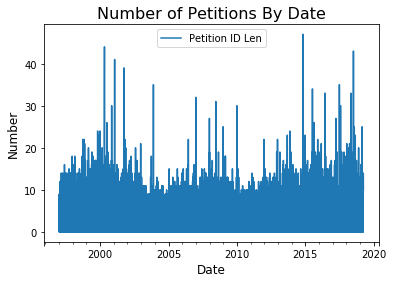

<Figure size 576x360 with 0 Axes>

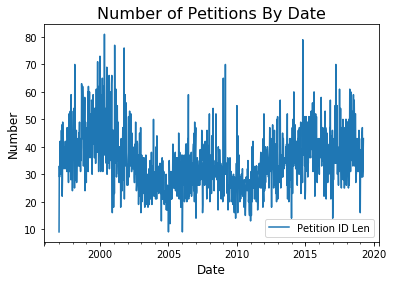

<Figure size 1008x504 with 0 Axes>

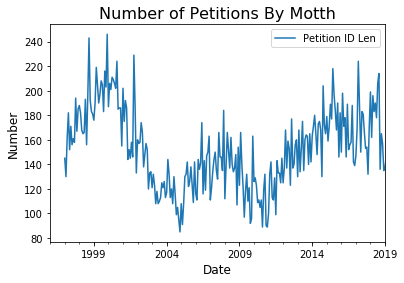

<Figure size 576x360 with 0 Axes>

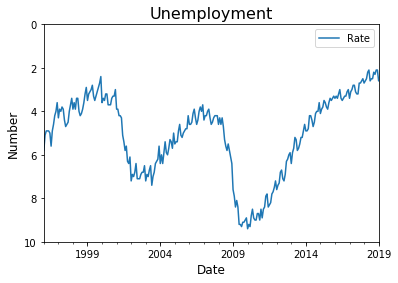

In [5]:
# Day
plt.figure(figsize = (8,5))
petition_day_count_df.plot(kind="line", color='#1f77b4')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Number of Petitions By Date', fontsize=16)
#plt.savefig("Figures/Number of Petitions By Date.png", transparent=True, bbox_inches="tight")
plt.show()

# Week
plt.figure(figsize = (8,5))
petition_week_count_df.plot(kind="line", color='#1f77b4')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Number of Petitions By Date', fontsize=16)
#plt.savefig("Figures/Number of Petitions By Date.png", transparent=True, bbox_inches="tight")
plt.show()

# Month
plt.figure(figsize = (14,7))
petition_month_count_df.plot(kind="line", color='#1f77b4')
plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Number of Petitions By Motth', fontsize=16)
#plt.savefig("Figures/Number of Petitions By Month.png", transparent=True, bbox_inches="tight")
plt.show()

# Unemployment Month
plt.figure(figsize = (8,5))
unemployment_df.plot(kind="line", color='#1f77b4')
plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
plt.ylim(10, 0)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Unemployment', fontsize=16)
#plt.savefig("Figures/Number of Petitions By Date.png", transparent=True, bbox_inches="tight")
plt.show()

<Figure size 1008x504 with 0 Axes>

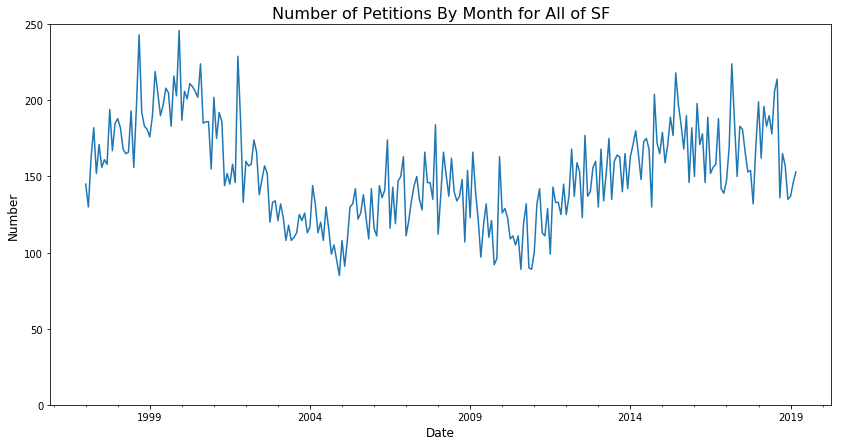

In [24]:
# Month, large
plt.figure(figsize = (14,7))
petition_month_count_df.plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.ylim(0, 250)
plt.title('Number of Petitions By Month for All of SF', fontsize=16)
plt.savefig("Figures/Number of Petitions By Month.png", transparent=True, bbox_inches="tight")
plt.show()

# Supervisor Districts

In [7]:
petition_df['Current Supervisor Districts'].value_counts(dropna = False).sort_index()

 1.0     2275
 2.0     4327
 3.0     5181
 4.0     3617
 5.0     5488
 6.0     4323
 7.0     2202
 8.0     1993
 9.0     2060
 10.0    3232
 11.0    5366
NaN       685
Name: Current Supervisor Districts, dtype: int64

In [8]:
petition_df[petition_df['Current Supervisor Districts'] == 1]

,Date,Address,latlong,Zip Code,Neighborhood Number,Neighborhood Name,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Supervisor District,...,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,:@computed_region_bh8s_q3mv,Datetime,Timestamp,Latitude,Longitude,Petition ID List,Petition ID Len
17,03/28/2019,500 Block Of Athens Street,"(37.71928199230839, -122.430129309919)",94112.0,7.0,Excelsior,90.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-03-28,737146.0,37.719282,-122.430129,['L190439'],1
53,03/21/2019,0 Block Of Naglee Avenue,"(37.71191504847476, -122.44639642083841)",94112.0,28.0,Outer Mission,66.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-03-21,737139.0,37.711915,-122.446396,['L190412'],1
102,03/12/2019,0 Block Of Tingley Street,"(37.728818169926036, -122.43285648509621)",94112.0,28.0,Outer Mission,94.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-03-12,737130.0,37.728818,-122.432856,['E190374'],1
121,03/07/2019,100 Block Of Sickles Avenue,"(37.709461483426445, -122.45351923883872)",94112.0,28.0,Outer Mission,66.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-03-07,737125.0,37.709461,-122.453519,['E190362'],1
142,03/01/2019,100 Block Of Ramsell Street,"(37.71360961322444, -122.46612170193971)",94132.0,24.0,Oceanview/Merced/Ingleside,65.0,10.0,1.0,11.0,...,8.0,6.0,9.0,64.0,2019-03-01,737119.0,37.713610,-122.466122,['E190331'],1
162,02/28/2019,400 Block Of Rolph Street,"(37.712688243376554, -122.4345799043739)",94124.0,7.0,Excelsior,58.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-02-28,737118.0,37.712688,-122.434580,['T190304'],1
195,02/22/2019,300 Block Of London Street,"(37.72351175738047, -122.43456167861449)",94112.0,7.0,Excelsior,90.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-02-22,737112.0,37.723512,-122.434562,['L190271'],1
230,02/19/2019,600 Block Of Huron Avenue,"(37.71237572171696, -122.44907155767567)",94112.0,28.0,Outer Mission,66.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-02-19,737109.0,37.712376,-122.449072,['L190206'],1
259,02/11/2019,300 Block Of Foote Avenue,"(37.71561968737009, -122.44838188524074)",94112.0,28.0,Outer Mission,66.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-02-11,737101.0,37.715620,-122.448382,['T190218'],1
274,02/07/2019,100 Block Of Foote Avenue,"(37.71376443738582, -122.44606954336582)",94112.0,28.0,Outer Mission,66.0,9.0,1.0,11.0,...,7.0,6.0,9.0,28861.0,2019-02-07,737097.0,37.713764,-122.446070,['T190214'],1


<Figure size 576x360 with 0 Axes>

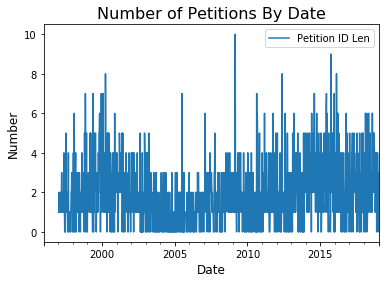

<Figure size 576x360 with 0 Axes>

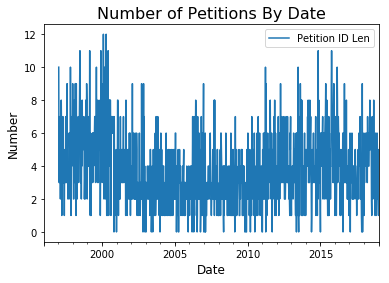

<Figure size 576x360 with 0 Axes>

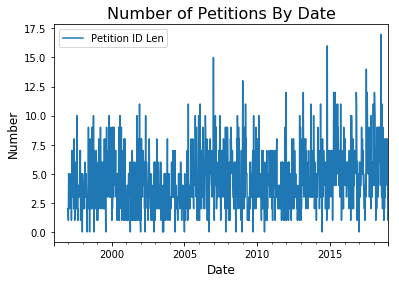

<Figure size 576x360 with 0 Axes>

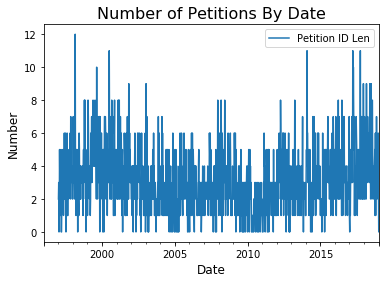

<Figure size 576x360 with 0 Axes>

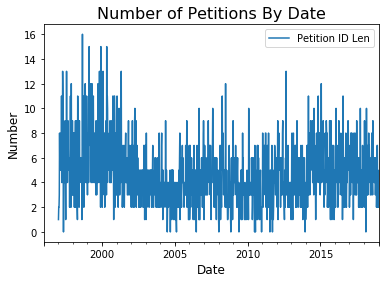

<Figure size 576x360 with 0 Axes>

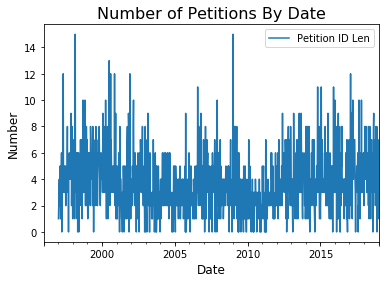

<Figure size 576x360 with 0 Axes>

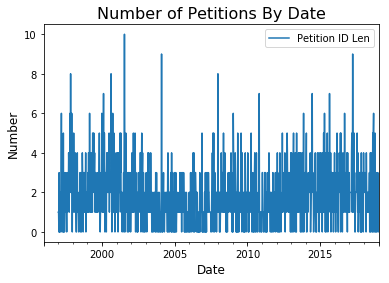

<Figure size 576x360 with 0 Axes>

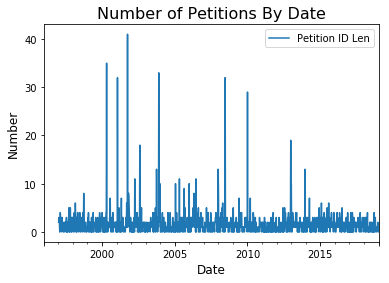

<Figure size 576x360 with 0 Axes>

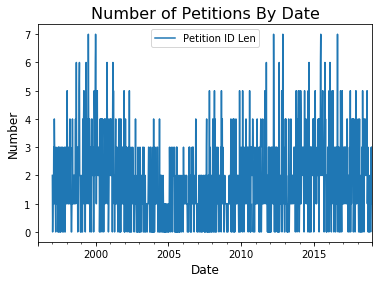

<Figure size 576x360 with 0 Axes>

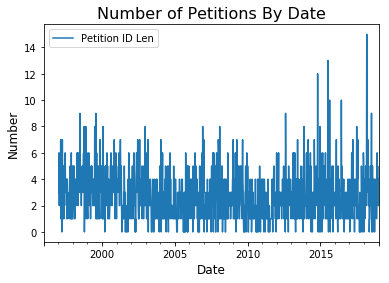

In [9]:
# Check distribution by date
for i in range(1, 11):
    plt.figure(figsize = (8,5))
    petition_df[petition_df['Current Supervisor Districts'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("W", key="Datetime")).count().plot(kind="line", color='#1f77b4')
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.title('Number of Petitions By Date', fontsize=16)
    #plt.savefig("Figures/Number of Petitions By Date.png", transparent=True, bbox_inches="tight")

<Figure size 576x360 with 0 Axes>

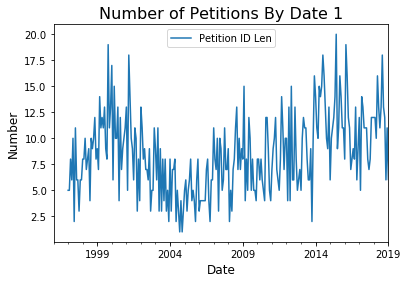

<Figure size 576x360 with 0 Axes>

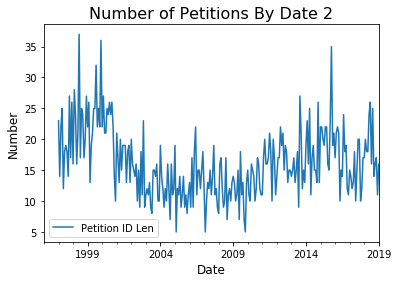

<Figure size 576x360 with 0 Axes>

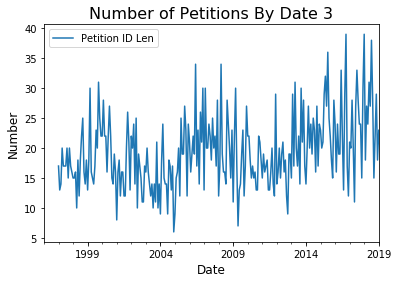

<Figure size 576x360 with 0 Axes>

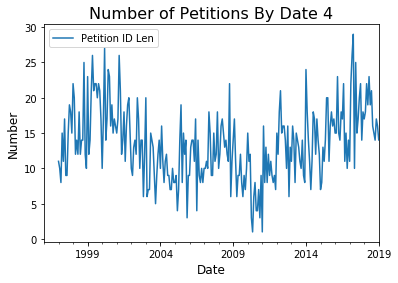

<Figure size 576x360 with 0 Axes>

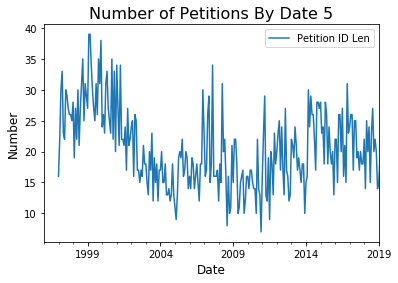

<Figure size 576x360 with 0 Axes>

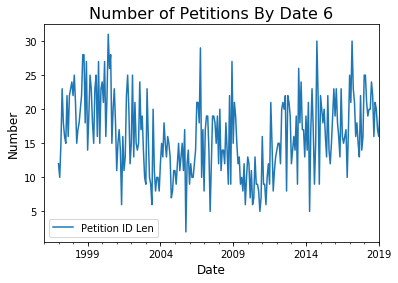

<Figure size 576x360 with 0 Axes>

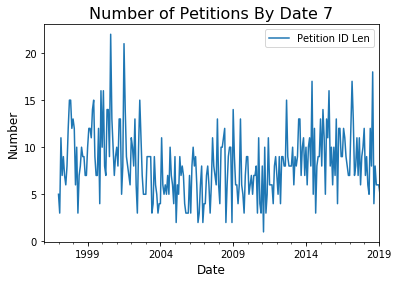

<Figure size 576x360 with 0 Axes>

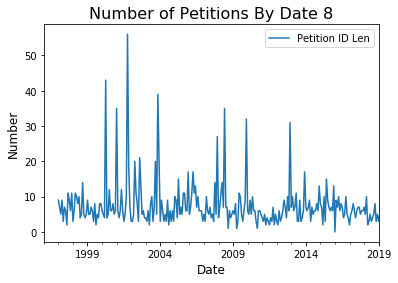

<Figure size 576x360 with 0 Axes>

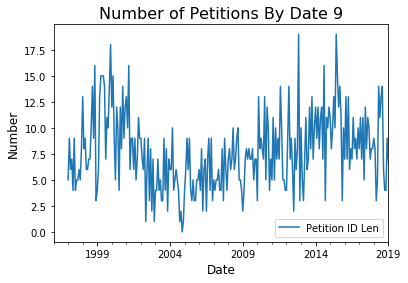

<Figure size 576x360 with 0 Axes>

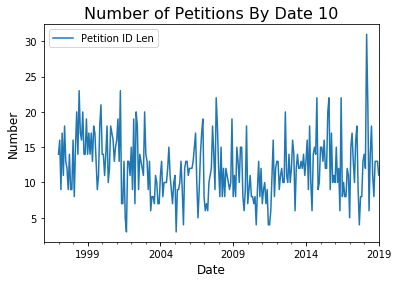

<Figure size 576x360 with 0 Axes>

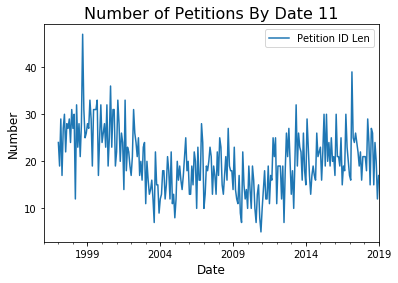

In [10]:
# Check distribution by month
for i in range(1, 12):
    plt.figure(figsize = (8,5))
    petition_df[petition_df['Current Supervisor Districts'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().plot(kind="line", color='#1f77b4')
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.title('Number of Petitions By Date {}'.format(i), fontsize=16)
    #plt.savefig("Figures/Number of Petitions By Date.png", transparent=True, bbox_inches="tight")

In [11]:
# Which neighborhoods are in Neighborhood Number 8?
petition_df[petition_df['Current Supervisor Districts'] == 8]['Neighborhood Number'].value_counts().sort_index()

14.0    476
16.0    761
24.0    133
35.0     35
38.0     16
41.0    572
Name: Neighborhood Number, dtype: int64

In [12]:
petition_df[petition_df['Current Supervisor Districts'] == 8]['Neighborhood Name'].value_counts().sort_index()

Inner Sunset                  476
Lakeshore                     761
Oceanview/Merced/Ingleside    133
Sunset/Parkside                35
Twin Peaks                     16
West of Twin Peaks            572
Name: Neighborhood Name, dtype: int64

# Neighborhood Number

In [13]:
neighborhood_dict = {}

for i in range(1, 27):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

for i in range(28, 42):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

neighborhood_dict

{1: 'Bayview Hunters Point',
 2: 'Bernal Heights',
 3: 'Haight Ashbury',
 4: 'Mission Bay',
 5: 'Castro/Upper Market',
 6: 'Chinatown',
 7: 'Excelsior',
 8: 'Financial District/South Beach',
 9: 'Hayes Valley',
 10: 'Glen Park',
 11: 'Inner Richmond',
 12: 'Golden Gate Park',
 13: 'Marina',
 14: 'Inner Sunset',
 15: 'Japantown',
 16: 'Lakeshore',
 17: 'Lincoln Park',
 18: 'Lone Mountain/USF',
 19: 'McLaren Park',
 20: 'Mission',
 21: 'Nob Hill',
 22: 'Noe Valley',
 23: 'North Beach',
 24: 'Oceanview/Merced/Ingleside',
 25: 'Portola',
 26: 'Potrero Hill',
 28: 'Outer Mission',
 29: 'Outer Richmond',
 30: 'Pacific Heights',
 31: 'Presidio Heights',
 32: 'Russian Hill',
 33: 'Seacliff',
 34: 'South of Market',
 35: 'Sunset/Parkside',
 36: 'Tenderloin',
 37: 'Treasure Island',
 38: 'Twin Peaks',
 39: 'Western Addition',
 40: 'Visitacion Valley',
 41: 'West of Twin Peaks'}

<Figure size 576x360 with 0 Axes>

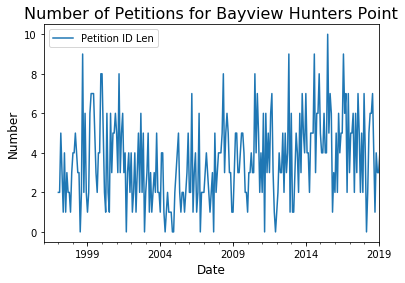

<Figure size 576x360 with 0 Axes>

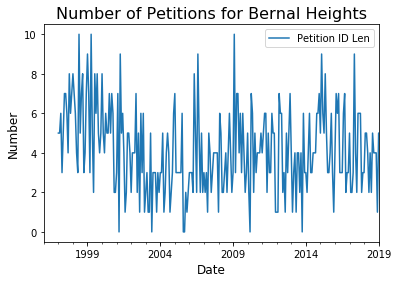

<Figure size 576x360 with 0 Axes>

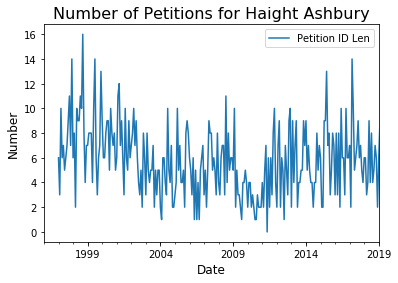

<Figure size 576x360 with 0 Axes>

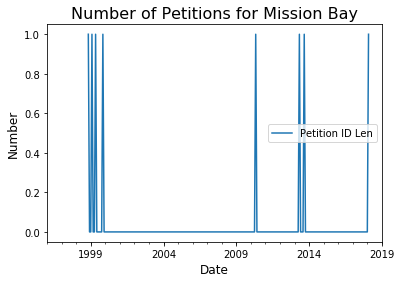

<Figure size 576x360 with 0 Axes>

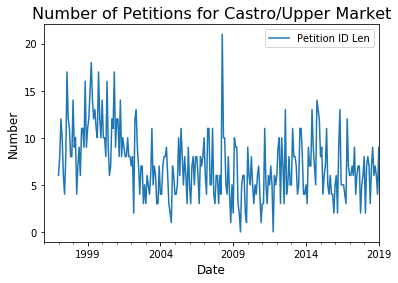

<Figure size 576x360 with 0 Axes>

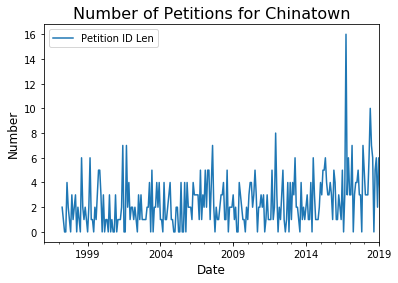

<Figure size 576x360 with 0 Axes>

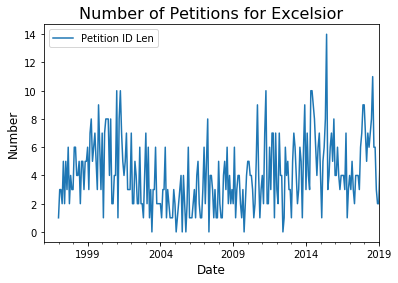

<Figure size 576x360 with 0 Axes>

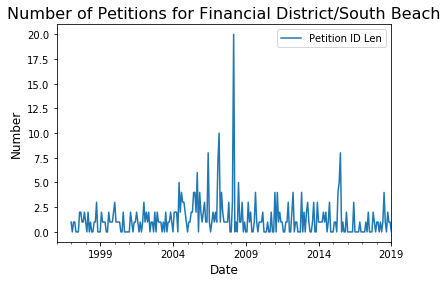

<Figure size 576x360 with 0 Axes>

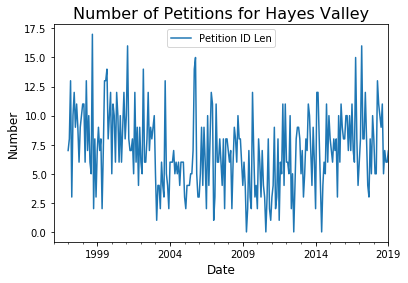

<Figure size 576x360 with 0 Axes>

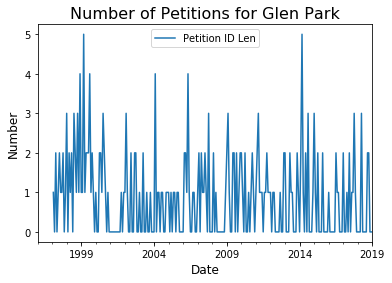

<Figure size 576x360 with 0 Axes>

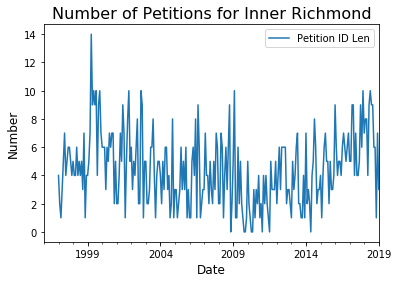

<Figure size 576x360 with 0 Axes>

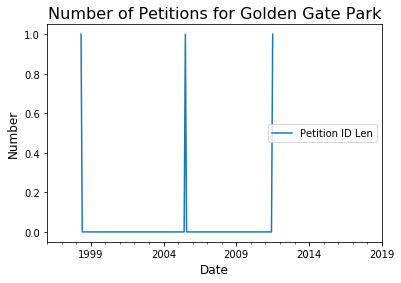

<Figure size 576x360 with 0 Axes>

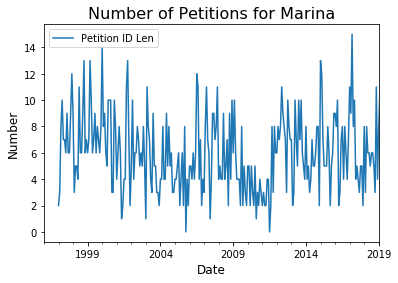

<Figure size 576x360 with 0 Axes>

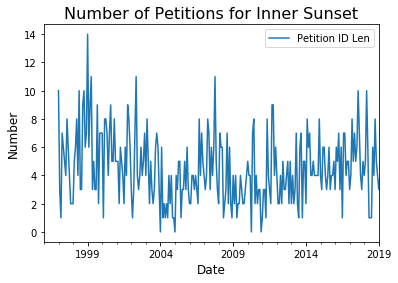

<Figure size 576x360 with 0 Axes>

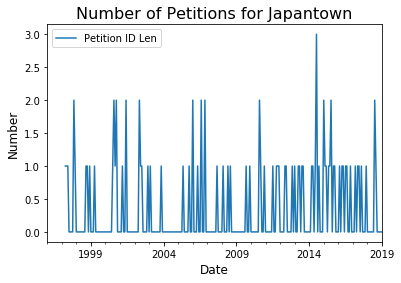

<Figure size 576x360 with 0 Axes>

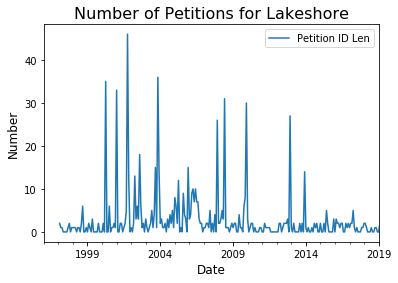

<Figure size 576x360 with 0 Axes>

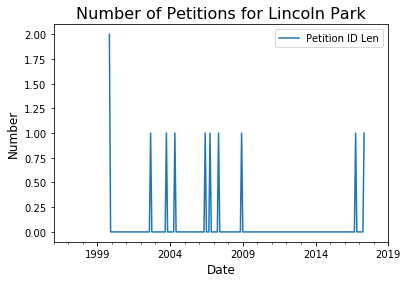

<Figure size 576x360 with 0 Axes>

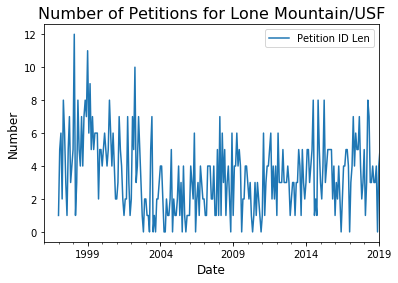

<Figure size 576x360 with 0 Axes>

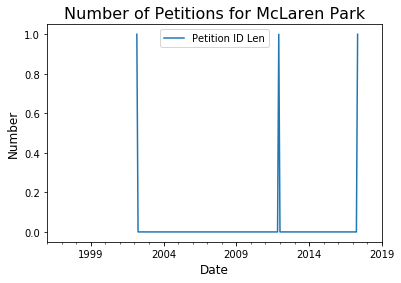

<Figure size 576x360 with 0 Axes>

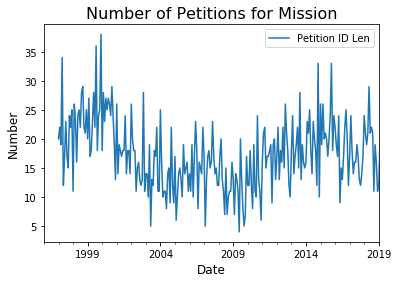

<Figure size 576x360 with 0 Axes>

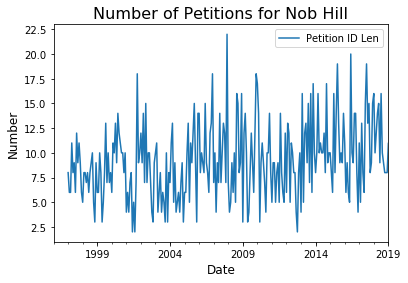

<Figure size 576x360 with 0 Axes>

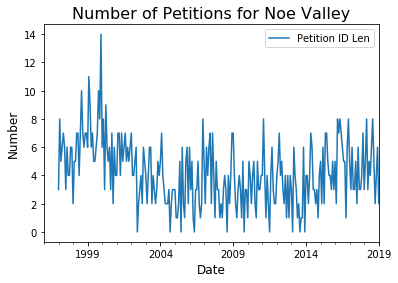

<Figure size 576x360 with 0 Axes>

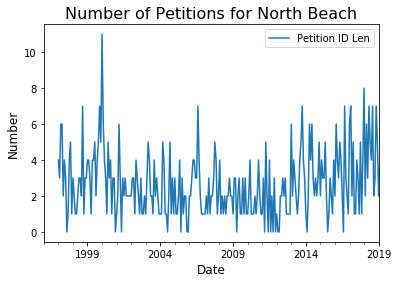

<Figure size 576x360 with 0 Axes>

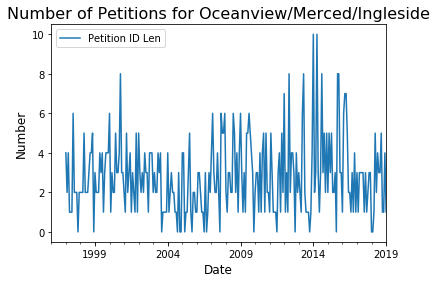

<Figure size 576x360 with 0 Axes>

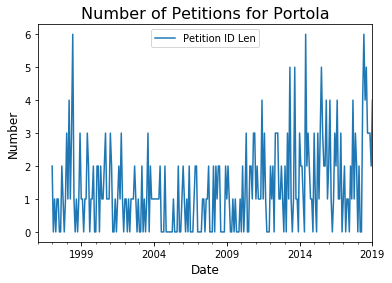

<Figure size 576x360 with 0 Axes>

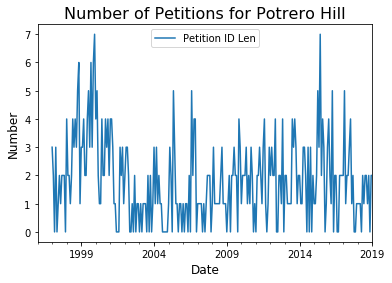

<Figure size 576x360 with 0 Axes>

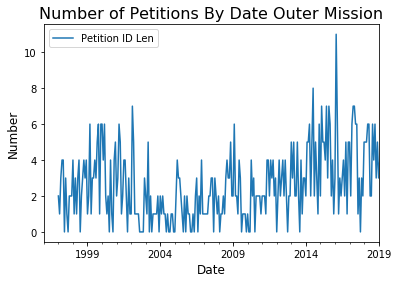

<Figure size 576x360 with 0 Axes>

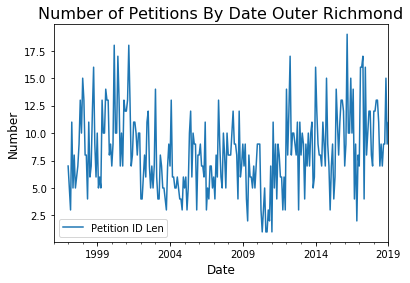

<Figure size 576x360 with 0 Axes>

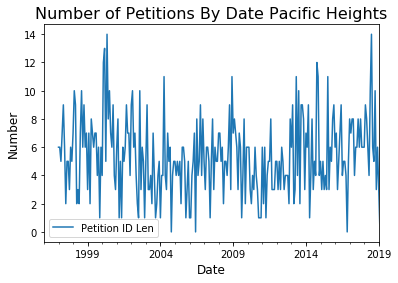

<Figure size 576x360 with 0 Axes>

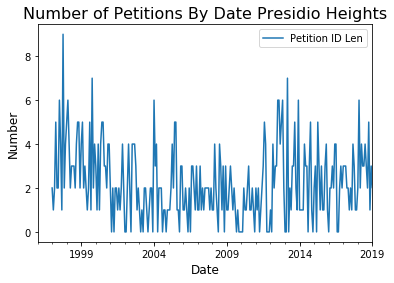

<Figure size 576x360 with 0 Axes>

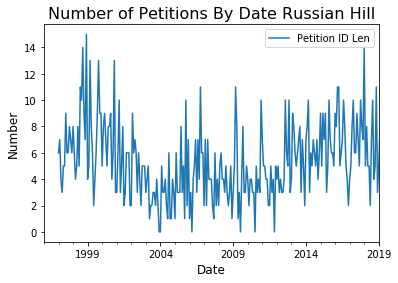

<Figure size 576x360 with 0 Axes>

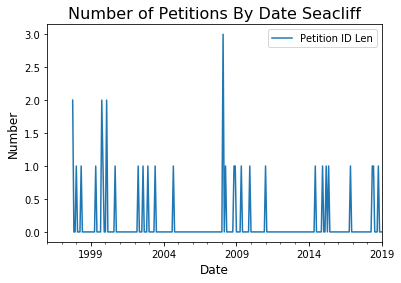

<Figure size 576x360 with 0 Axes>

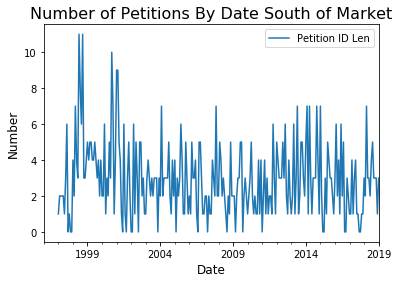

<Figure size 576x360 with 0 Axes>

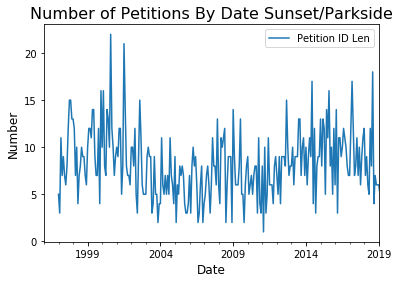

<Figure size 576x360 with 0 Axes>

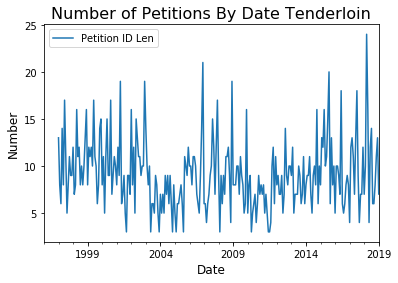

<Figure size 576x360 with 0 Axes>

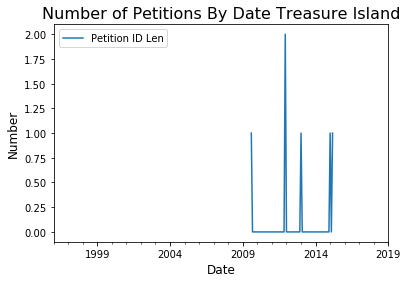

<Figure size 576x360 with 0 Axes>

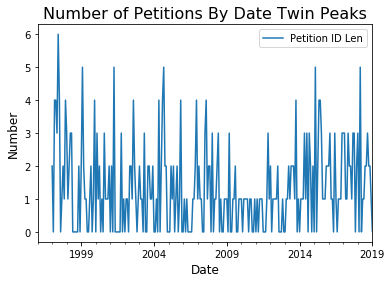

<Figure size 576x360 with 0 Axes>

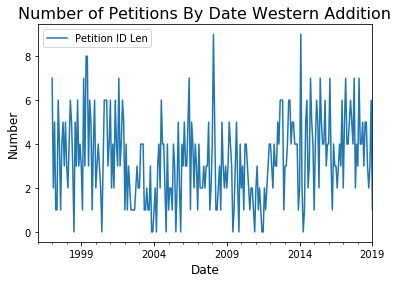

<Figure size 576x360 with 0 Axes>

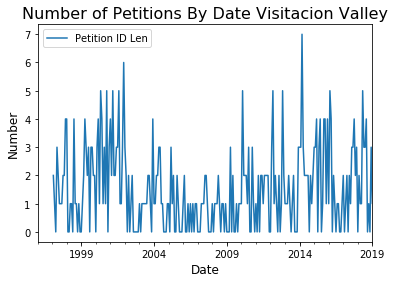

<Figure size 576x360 with 0 Axes>

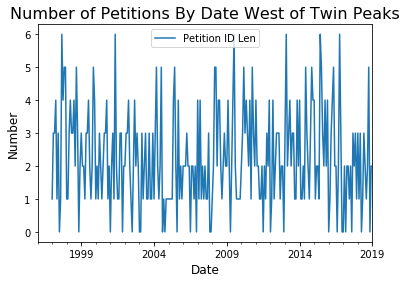

In [14]:
# Check distribution of data over time by neighborhood number one by one

for i in range(1, 27):
    plt.figure(figsize = (8,5))
    petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().plot(kind="line", color='#1f77b4')
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.title('Number of Petitions for {}'.format(neighborhood_dict[i]), fontsize=16)
    plt.savefig("Figures/Neighborhood/Number of Petitions for {}.png".format(i), transparent=True, bbox_inches="tight")
    
# Check distribution of data over time by neighborhood number
for i in range(28, 42):
    plt.figure(figsize = (8,5))
    petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().plot(kind="line", color='#1f77b4')
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.title('Number of Petitions By Date {}'.format(neighborhood_dict[i]), fontsize=16)
    plt.savefig("Figures/Neighborhood/Number of Petitions for {}.png".format(i), transparent=True, bbox_inches="tight")

In [15]:
# NA that has its own pattern
print(neighborhood_dict[16])

Lakeshore


In [16]:
# NAs that have bad data
print(neighborhood_dict[15])
print(neighborhood_dict[33])
print(neighborhood_dict[40])

Japantown
Seacliff
Visitacion Valley


# Get distribution of counts

In [17]:
petition_day_counts_df = pd.DataFrame(petition_day_count_df['Petition ID Len'].value_counts().sort_index())
petition_week_counts_df = pd.DataFrame(petition_week_count_df['Petition ID Len'].value_counts().sort_index())
petition_month_counts_df = pd.DataFrame(petition_month_count_df['Petition ID Len'].value_counts().sort_index())

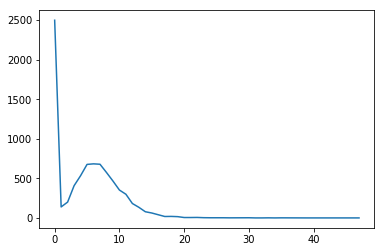

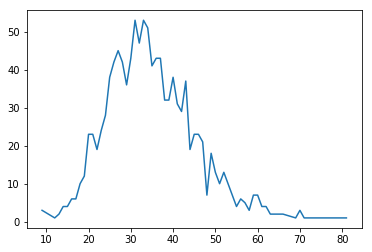

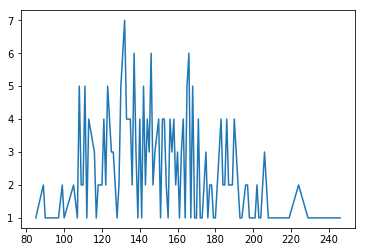

In [18]:
plt.plot(petition_day_counts_df)
plt.show()

plt.plot(petition_week_counts_df)
plt.show()

plt.plot(petition_month_counts_df)
plt.show()